# CPSC 330 - Applied Machine Learning 

## Homework 6: Putting it all together 
### Associated lectures: All material till lecture 13 

**Due date: Wednesday, March 15, 2023 at 11:59pm**

## Table of contents

- [Submission instructions](#si)
- [Understanding the problem](#1)
- [Data splitting](#2)
- [EDA](#3)
- (Optional) [Feature engineering](#4)
- [Preprocessing and transformations](#5)
- [Baseline model](#6)
- [Linear models](#7)
- [Different classifiers](#8)
- (Optional) [Feature selection](#9)
- [Hyperparameter optimization](#10)
- [Interpretation and feature importances](#11)
- [Results on the test set](#12)
- (Optional) [Explaining predictions](#13)
- [Summary of the results](#14)

## Imports 

In [1]:
import os

%matplotlib inline
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    plot_confusion_matrix,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.svm import SVC
from scipy.stats import loguniform

<br><br>

## Instructions 
<hr>
rubric={points:2}

Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2022W2/blob/main/docs/homework_instructions.md). 

**You may work on this homework in a group and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 3. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).

<br><br>

## Introduction <a name="in"></a>
<hr>

At this point we are at the end of supervised machine learning part of the course. So in this homework, you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips

1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). **Make sure you explain your decisions whenever necessary.** 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 
4. If you are having trouble running models on your laptop because of the size of the dataset, you can create your train/test split in such a way that you have less data in the train split. If you end up doing this, please write a note to the grader in the submission explaining why you are doing it.  

#### Assessment

We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.

#### A final note

Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (2-8 hours???) is a good guideline for a typical submission. Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

## 1. Understanding the problem <a name="1"></a>
<hr>
rubric={points:4}

In this mini project, you will be working on a classification problem of predicting whether a customer will cancel the reservation they have made at a hotel. 
For this problem, you will use [Reservation Cancellation Prediction Dataset](https://www.kaggle.com/datasets/gauravduttakiit/reservation-cancellation-prediction?select=train__dataset.csv). In this data set, there are about 18.000 examples and 18 features (including the target), and the goal is to estimate whether a person will cancel their booking; this column is labeled "booking_status" in the data (1 = canceled). 

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. You can find this information in the documentation on [the dataset page on Kaggle](https://www.kaggle.com/datasets/gauravduttakiit/reservation-cancellation-prediction?select=train__dataset.csv). Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe. 

Ans 1.1) We explore the factors that might effect the bookings made by a person, and if those factors result in cancellation of booking. since this is a classification problem we will get 0 or 1=cancelled as out response. there seem to be some variables that might be insignificant in changing the response majorly and hence we will do exploratory analysis to find a model that works best for our data with the explanatory variables that are needed.

In [2]:
hotel_df = pd.read_csv("train__dataset.csv")
hotel_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,4,0,0,0,118,2017,12,28,1,0,0,0,110.80,2,0
1,2,1,0,2,0,0,0,17,2018,4,14,1,0,0,0,145.00,0,1
2,1,0,1,5,0,0,0,349,2018,10,4,0,0,0,0,96.67,0,1
3,1,0,2,4,0,0,0,69,2018,6,12,0,0,0,0,120.00,0,1
4,2,0,0,4,1,0,0,11,2018,1,20,1,0,0,0,69.50,1,0


<br><br>

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train and test portions. 

In [3]:
df_train, df_test = train_test_split(hotel_df, test_size=0.2, random_state=321)



<br><br>

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

In [4]:
describe_df_train = df_train.describe(include='all')
describe_df_train.loc['range'] = describe_df_train.loc['max'] - describe_df_train.loc['min']
describe_df_train

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,14509.000000,14509.000000,14509.000000,14509.000000,14509.000000,14509.000000,14509.000000,14509.000000,14509.000000,14509.000000,14509.000000,14509.000000,14509.000000,14509.000000,14509.000000,14509.000000,14509.000000,14509.000000
mean,1.846647,0.106623,0.809566,2.207802,0.322765,0.032256,0.337101,85.312358,2017.822524,7.425391,15.705838,0.809842,0.025364,0.021986,0.157764,103.405252,0.615067,0.328348
std,0.516063,0.409770,0.873389,1.428241,0.631708,0.176685,0.770825,86.327332,0.382084,3.080915,8.786066,0.651839,0.157232,0.344317,1.810233,35.746857,0.783460,0.469628
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,0.000000,80.300000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,1.000000,0.000000,0.000000,0.000000,99.450000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,127.000000,2018.000000,10.000000,23.000000,1.000000,0.000000,0.000000,0.000000,120.000000,1.000000,1.000000
max,4.000000,9.000000,6.000000,17.000000,3.000000,1.000000,6.000000,443.000000,2018.000000,12.000000,31.000000,4.000000,1.000000,11.000000,58.000000,540.000000,5.000000,1.000000
range,4.000000,9.000000,6.000000,17.000000,3.000000,1.000000,6.000000,443.000000,1.000000,11.000000,30.000000,4.000000,1.000000,11.000000,58.000000,540.000000,5.000000,1.000000


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14509 entries, 14359 to 6682
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          14509 non-null  int64  
 1   no_of_children                        14509 non-null  int64  
 2   no_of_weekend_nights                  14509 non-null  int64  
 3   no_of_week_nights                     14509 non-null  int64  
 4   type_of_meal_plan                     14509 non-null  int64  
 5   required_car_parking_space            14509 non-null  int64  
 6   room_type_reserved                    14509 non-null  int64  
 7   lead_time                             14509 non-null  int64  
 8   arrival_year                          14509 non-null  int64  
 9   arrival_month                         14509 non-null  int64  
 10  arrival_date                          14509 non-null  int64  
 11  market_segme

In [6]:
cancelled_bookings = df_train.query("booking_status == 1")
not_cancelled_examples = df_train.query("booking_status == 0")

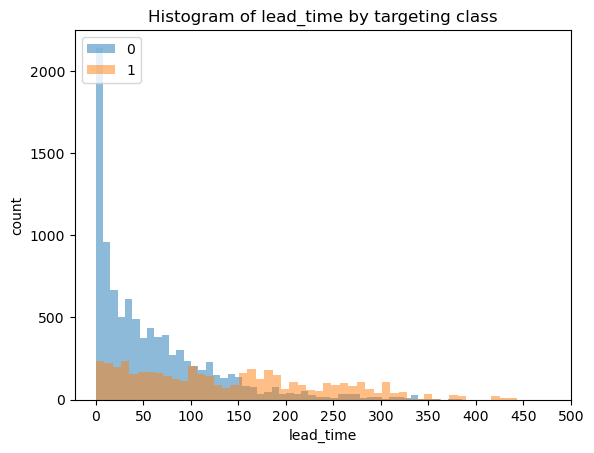

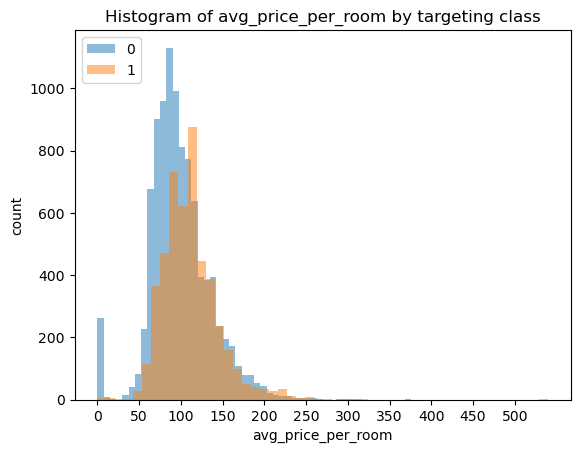

In [7]:
features=['lead_time','avg_price_per_room']
for feature in features:
    plt.hist(not_cancelled_examples[feature], label='0', alpha=0.5, bins=50)
    plt.hist(cancelled_bookings[feature], label='1', alpha=0.5, bins=50)
    plt.title('Histogram of '+ feature +' by targeting class')
    plt.legend(loc='upper left')
    plt.xlabel(feature)
    plt.ylabel("count")
    plt. xticks([0,50,100,150,200,250,300,350,400,450,500])
    plt.show()

for figure 1 histogram of lead_time by targeting class we notice that proportion of cancelled bookings is more when Number of days between the date of booking and the arrival date is greater than approximately 150 days
<br>
<br>

for figure 2 histogramof avg_price_per_room by targeting class, the proportion of cancelled bookings is more when Average price per day of the reservation is greater than 110 euros

we have complete datset with no missing values so that reduces our work of using Imputation. 

In [8]:
scoring_metric = "accuracy", "recall"

<br><br>

## (Optional) 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

In [9]:
df_train['total_bookings'] = df_train['no_of_previous_cancellations'] + df_train['no_of_previous_bookings_not_canceled']
df_train['is_holiday_season'] = df_train['arrival_month'].apply(lambda x: 1 if (x == 12 or x==1)  else 0)
df_test['total_bookings'] = df_test['no_of_previous_cancellations'] + df_test['no_of_previous_bookings_not_canceled']
df_test['is_holiday_season'] = df_test['arrival_month'].apply(lambda x: 1 if (x == 12 or x==1)  else 0)
df_train
#https://www.geeksforgeeks.org/applying-lambda-functions-to-pandas-dataframe/

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,total_bookings,is_holiday_season
14359,2,0,0,1,0,0,1,29,2018,5,18,1,0,0,0,156.00,0,1,0,0
5981,2,0,2,2,0,0,0,76,2018,4,10,1,0,0,0,90.95,1,0,0,0
15130,1,0,0,4,0,1,0,213,2018,9,27,1,0,0,0,118.65,0,1,0,0
1055,2,0,0,3,0,0,0,162,2017,9,17,0,0,0,0,70.00,0,0,0,0
12427,2,0,0,2,0,0,0,177,2018,6,3,0,0,0,0,100.00,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11976,1,0,0,1,0,0,0,1,2017,9,22,1,0,0,0,158.00,0,0,0,0
5929,2,0,1,0,0,0,0,123,2017,7,13,1,0,0,0,76.50,1,1,0,0
11039,1,0,0,2,0,0,0,2,2018,11,17,1,0,0,0,103.00,1,1,0,0
4220,2,0,2,3,0,0,1,68,2018,3,20,1,0,0,0,99.45,1,0,0,0


- total_booking refers to the total number of bookings made by that particular customer for all times
- is_holiday_season is a column with binary values which refer to 1 if the booking arrival_month is December or January(holiday season) and 0 otherwise. this might be useful if we consider the number of cancelled bookings during holiday season since it is alwsys busy and difficult to book during that time.

<br><br>

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

In [10]:
df_train.info()
df_train.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 14509 entries, 14359 to 6682
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          14509 non-null  int64  
 1   no_of_children                        14509 non-null  int64  
 2   no_of_weekend_nights                  14509 non-null  int64  
 3   no_of_week_nights                     14509 non-null  int64  
 4   type_of_meal_plan                     14509 non-null  int64  
 5   required_car_parking_space            14509 non-null  int64  
 6   room_type_reserved                    14509 non-null  int64  
 7   lead_time                             14509 non-null  int64  
 8   arrival_year                          14509 non-null  int64  
 9   arrival_month                         14509 non-null  int64  
 10  arrival_date                          14509 non-null  int64  
 11  market_segme

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,total_bookings,is_holiday_season
14359,2,0,0,1,0,0,1,29,2018,5,18,1,0,0,0,156.00,0,1,0,0
5981,2,0,2,2,0,0,0,76,2018,4,10,1,0,0,0,90.95,1,0,0,0
15130,1,0,0,4,0,1,0,213,2018,9,27,1,0,0,0,118.65,0,1,0,0
1055,2,0,0,3,0,0,0,162,2017,9,17,0,0,0,0,70.00,0,0,0,0
12427,2,0,0,2,0,0,0,177,2018,6,3,0,0,0,0,100.00,0,1,0,0


In [11]:
numeric_features = ["no_of_adults",	"no_of_children", "no_of_weekend_nights", "no_of_week_nights", "lead_time",
                    'no_of_previous_cancellations','no_of_previous_bookings_not_canceled', 'avg_price_per_room',
                    'no_of_special_requests','total_bookings'] #apply scaling
categorical_features = ["type_of_meal_plan", "room_type_reserved",'market_segment_type',] # apply OHE
ordinal_features = []
binary_features = ["required_car_parking_space",'repeated_guest', 'is_holiday_season'] # no transformations on binary features
drop_features = [] # do not include these features
passthrough_features = ['arrival_year','arrival_month','arrival_date'] #do not change 
target = "booking_status"

In [12]:
X_train = df_train.drop(columns=["booking_status"])
X_test = df_test.drop(columns=["booking_status"])

y_train = df_train["booking_status"]
y_test = df_test["booking_status"]

X_train_split, X_valid, y_train_split, y_valid = train_test_split(
    X_train, y_train, test_size=0.3, random_state=123
)

In [13]:
ct = make_column_transformer(    
    (StandardScaler(), numeric_features),  # scaling on numeric features
    ("passthrough", passthrough_features+ binary_features),  # no transformations on the binary features and date features  
    (OneHotEncoder(), categorical_features ),  # OHE on categorical features
)
ct

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['no_of_adults', 'no_of_children',
                                  'no_of_weekend_nights', 'no_of_week_nights',
                                  'lead_time', 'no_of_previous_cancellations',
                                  'no_of_previous_bookings_not_canceled',
                                  'avg_price_per_room',
                                  'no_of_special_requests', 'total_bookings']),
                                ('passthrough', 'passthrough',
                                 ['arrival_year', 'arrival_month',
                                  'arrival_date', 'required_car_parking_space',
                                  'repeated_guest', 'is_holiday_season']),
                                ('onehotencoder', OneHotEncoder(),
                                 ['type_of_meal_plan', 'room_type_reserved',
                                  'market_segment_type'])])

In [14]:
X_transformed = ct.fit_transform(X_train_split)
X_transformed_valid=ct.transform(X_valid)


In [15]:
column_names = (
    numeric_features
    + passthrough_features+ binary_features
    + ct.named_transformers_["onehotencoder"].get_feature_names_out().tolist()
)
column_names

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'lead_time',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests',
 'total_bookings',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'required_car_parking_space',
 'repeated_guest',
 'is_holiday_season',
 'type_of_meal_plan_0',
 'type_of_meal_plan_1',
 'type_of_meal_plan_2',
 'type_of_meal_plan_3',
 'room_type_reserved_0',
 'room_type_reserved_1',
 'room_type_reserved_2',
 'room_type_reserved_3',
 'room_type_reserved_4',
 'room_type_reserved_5',
 'room_type_reserved_6',
 'market_segment_type_0',
 'market_segment_type_1',
 'market_segment_type_2',
 'market_segment_type_3',
 'market_segment_type_4']

<br><br>

## 6. Baseline model <a name="6"></a>
<hr>

rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

In [16]:
def mean_std_cross_val_scores(model, X_train_split, y_train_split, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train_split, y_train_split, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

dummy = DummyClassifier(strategy="most_frequent")
dummy_scores = mean_std_cross_val_scores(dummy, X_train_split, y_train_split, return_train_score=True)


In [17]:
pd.DataFrame(dummy_scores).T

,fit_time,score_time,test_score,train_score
0,0.001 (+/- 0.000),0.000 (+/- 0.000),0.670 (+/- 0.000),0.670 (+/- 0.000)


In [18]:
dummy.fit(X_train_split,y_train_split)
dummy.score(X_valid,y_valid)*100

67.65449115552492

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:12}

**Your tasks:**

1. Try logistic regression as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter `C`. 
3. Report validation scores along with standard deviation. 
4. Summarize your results.

In [19]:
lr=LogisticRegression(max_iter=10000)
scoring = ["accuracy","precision","f1","recall"]
scores = mean_std_cross_val_scores(lr, X_transformed, y_train_split, return_train_score=True)
pd.DataFrame(scores)


,0
fit_time,0.323 (+/- 0.093)
score_time,0.001 (+/- 0.000)
test_score,0.804 (+/- 0.010)
train_score,0.804 (+/- 0.002)


In [20]:
param_grid = {
    "C": loguniform(0.0001, 10000),
}
print(param_grid)
random_search = RandomizedSearchCV(
    lr, param_distributions=param_grid, n_jobs=-1, n_iter=200, cv=5, random_state=42
)
random_search.fit(X_transformed, y_train_split)
random_search.score(X_transformed_valid, y_valid)


{'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x170831ae0>}


0.8040431886055593

In [21]:
print("best value for ",random_search.best_params_)
# random_search.cv_results_

best value for  {'C': 64.21632248858033}


In [22]:
pd.DataFrame(random_search.cv_results_)[
    [
        "param_C",
        "mean_test_score",
        "std_test_score",
        "mean_fit_time",
        "rank_test_score",
    ]
].set_index("rank_test_score").sort_index()

,param_C,mean_test_score,std_test_score,mean_fit_time
rank_test_score,,,,
1,64.216322,0.805730,0.008677,0.327613
2,68.683027,0.805533,0.009945,0.328589
3,0.445205,0.805139,0.008518,0.292103
4,1.171023,0.805041,0.008149,0.301972
5,1.249524,0.805041,0.009331,0.394260
...,...,...,...,...
196,0.00016,0.673592,0.000318,0.038111
197,0.000146,0.672706,0.000601,0.028854
198,0.000136,0.671229,0.000919,0.029692


4. we see thta the best hyperparameter value for C is 64.216 based on our choice of model LogisticRegression. and the highes cv test score is 0.805730. with the std of 0.008677.

<br><br>

## 8. Different classifiers <a name="8"></a>
<hr>
rubric={points:15}

**Your tasks:**
1. Try at least 3 other models aside from logistic regression. At least one of these models should be a tree-based ensemble model (e.g., lgbm, random forest, xgboost). 
2. Summarize your results. Can you beat logistic regression? 

In [23]:
from sklearn.tree import DecisionTreeClassifier
from lightgbm.sklearn import LGBMClassifier


In [24]:
pipe_dt = make_pipeline(ct, DecisionTreeClassifier(random_state=123))
pipe_rf = make_pipeline(ct, RandomForestClassifier(random_state=123))
pipe_lgbm = make_pipeline(ct, LGBMClassifier(random_state=123))

classifiers = {
    "LightGBM": pipe_lgbm,
    "decision tree": pipe_dt,
    "random forest": pipe_rf,}

In [25]:
results = {}



In [26]:
for (name, model) in classifiers.items():
    print(name)
    results[name] = mean_std_cross_val_scores(
        model, X_train_split, y_train_split, return_train_score=True, scoring=scoring_metric
    )
pd.DataFrame(results).T

LightGBM
decision tree
random forest


,fit_time,score_time,test_accuracy,train_accuracy,test_recall,train_recall
LightGBM,0.172 (+/- 0.079),0.009 (+/- 0.001),0.879 (+/- 0.006),0.916 (+/- 0.002),0.777 (+/- 0.011),0.843 (+/- 0.001)
decision tree,0.030 (+/- 0.001),0.004 (+/- 0.000),0.840 (+/- 0.018),0.996 (+/- 0.001),0.773 (+/- 0.016),0.991 (+/- 0.002)
random forest,0.477 (+/- 0.007),0.030 (+/- 0.001),0.885 (+/- 0.007),0.996 (+/- 0.001),0.779 (+/- 0.017),0.993 (+/- 0.001)


Yes, we can beat logistic regression. In fact, we can see that the three other classifiers we have tried all are performing better than the logistic regression model above, even without hyperparameter optimization

<br><br>

## (Optional) 9. Feature selection <a name="9"></a>
<hr>
rubric={points:1}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<br><br>

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:15}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. You may pick one of the best performing models from the previous exercise and tune hyperparameters only for that model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize)

In [27]:
from scipy.stats import randint, uniform

param_grid = {
    'num_leaves': [31, 127],
    'reg_alpha': [0.1, 0.5],
    'min_data_in_leaf': [30, 50, 100, 300, 400],
    
    }
grid_search = GridSearchCV(
    LGBMClassifier(random_state=123), param_grid, cv=5, n_jobs=-1, return_train_score=True

    
)

grid_search.fit(X_transformed, y_train_split)
score=mean_std_cross_val_scores(
        grid_search, X_transformed_valid, y_valid, return_train_score=True, scoring=scoring_metric
    )
grid_search.score(X_transformed_valid,y_valid)
print("best parameter is ",grid_search.best_params_)
print("best score is ", grid_search.best_score_)
pd.DataFrame(score).T

#https://stackoverflow.com/questions/50686645/grid-search-with-lightgbm-example

[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] min

,fit_time,score_time,test_accuracy,train_accuracy,test_recall,train_recall
0,1.559 (+/- 0.248),0.004 (+/- 0.001),0.857 (+/- 0.010),0.981 (+/- 0.019),0.750 (+/- 0.023),0.960 (+/- 0.036)


## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:15}

**Your tasks:**

1. Use the methods we saw in class (e.g., `eli5`, `shap`) (or any other methods of your choice) to explain feature importances of one of the best performing models. Summarize your observations. 

In [28]:
import eli5

pipe_lgbm = make_pipeline(ct, LGBMClassifier(random_state=123))
pipe_lgbm.fit(X_train_split, y_train_split)
eli5.explain_weights(
    pipe_lgbm.named_steps["lgbmclassifier"], feature_names=column_names
)

Weight,Feature
0.3681,lead_time
0.1481,avg_price_per_room
0.1134,no_of_special_requests
0.1005,market_segment_type_1
0.0437,arrival_month
0.0346,arrival_date
0.0346,is_holiday_season
0.0274,no_of_adults
0.0269,no_of_weekend_nights
0.0244,market_segment_type_0


we can see that the new feature that we engineered ranks fifth in the weights so it was a meaningful addition to the model. we also notice that a lot of features have very low weigths as compared to the top five with their weights being one tenth or less as compared to the top few features.however we cannot rule out the possibility that this feature combination might be making the higher ranked features more meaningful.

In [29]:
data = {
    "Importance": pipe_lgbm.named_steps["lgbmclassifier"].feature_importances_,
}
imps = pd.DataFrame(data=data, index=column_names,).sort_values(
    by="Importance", ascending=False
)[:10]
imps

,Importance
lead_time,683
avg_price_per_room,661
arrival_date,331
arrival_month,237
no_of_special_requests,207
no_of_week_nights,163
no_of_weekend_nights,147
is_holiday_season,80
no_of_adults,73
market_segment_type_0,69


now from the second analyis we notice again that the top two features still remain the same with higher importance as compared to the other features. we do see some similar name sin the top 6-7 features.

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:5}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 

In [32]:
pipe_lgbm = make_pipeline(ct, LGBMClassifier(random_state=123, min_data_in_leaf= 50,num_leaves= 127, reg_alpha= 0.1,min_child_samples=51))
final=mean_std_cross_val_scores(
        pipe_lgbm, X_test, y_test, return_train_score=True, scoring=scoring_metric
    )
pd.DataFrame(final).T
# pipe_lgbm.fit(X_train,y_train)
# pipe_lgbm.score(X_test,y_test)

[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=51 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=51 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=51 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=51 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=51 will be ignored. Current value: min_data_in_leaf=50


/opt/anaconda3/envs/cpsc330/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/cpsc330/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 74, in _cached_call
    return cache[method]
KeyError: 'predict'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/anaconda3/envs/cpsc330/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/anaconda3/envs/cpsc330/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 106, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/opt/anaconda3/envs/cpsc330/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 261, in _score
    y_

,fit_time,score_time,test_accuracy,train_accuracy,test_recall,train_recall
0,0.109 (+/- 0.018),0.005 (+/- 0.002),0.845 (+/- 0.022),0.968 (+/- 0.002),0.716 (+/- 0.064),0.927 (+/- 0.008)


2. yes the test scores do agree with the validation scores that we found above using our validation test sets. for the validation test sets we got a score of accuracy 0.8812514 and recall 0.750 (+/- 0.023) with our best params and testing on the testing data we get a score of 0.845 (+/- 0.022) and recall of 0.716 (+/- 0.064)	. we do trust our model however it does not seem to overfit the data hence i dont believe that optimization bias was involved.

<br><br>

## (Optional) 13. Explaining predictions 
rubric={points:1}

**Your tasks**

1. Take one or two test predictions and explain them with SHAP force plots.  

## 14. Summary of results <a name="13"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Report your final test score along with the metric you used. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 

1. final test score is 0.845 (+/- 0.022) accuracy and 0.716 (+/- 0.064)	recall
2. We ultimately used the lgbclassifier as it had the highest recall, the metric we tried to score our model with. We saw consistently improving scores (though huge changes weren't seen) with more techniques (feature importance) being applied to get more information about the features. Furthermore, hyperparameter optimization also helped us get better scores.
3.  We could have also tried to optimize for more hyperparameters than the ones we tried.3. -> Working with more feature combinations to see whether the feature importance changes or not is a good way to check if the important features are important by themselves or in the combination being used. 


## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 